<div style="background-image: url('https://img.freepik.com/free-vector/frigate-sailing-stormy-ocean-cartoon_1441-3174.jpg'); background-repeat: no-repeat;  background-position: center; background-attachment: cover; background-size: cover; padding: 80px; border-radius: 10px; color: white">
    <h1 align ="center" style="margin: 0; text-shadow: 4px 4px 8px black; color:white">Titanic Survival Prediction</h1>
</div>

# Introduction

The **RMS Titanic** was a **British passenger liner** that was commonly regarded as '**unsinkable**'. It sank on **April 15, 1912**, after striking with an iceberg. This disaster claimed the lives of **1502** of the **2224** passengers. [Click here](https://en.wikipedia.org/wiki/Titanic) to read full article about Titanic on [Wikipedia.](https://en.wikipedia.org/)

Kaggle's **['Titanic - Machine Learning from Disaster'](https://www.kaggle.com/competitions/titanic/overview)** challenge is the most popular ML challenge where the problem is to predict which passenger could survive and which couldn't according to few data such as age, gender, ticket class, etc.

Read the full challange from [here.](https://www.kaggle.com/competitions/titanic/overview)



# Gathering Data

To solve this problem a dataset is given by [Kaggle.](https://www.kaggle.com/) where they split dataset into two set one for training and another for testing. They also include a file named 'gender_submission.csv' as an example of what a submission file should look like.

To explore dataset [click here.](https://www.kaggle.com/competitions/titanic/data)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

import os

# Get data directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Load Train and Test Data

In [2]:
# Load the train data
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load the test data
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Data Shape
print('Train data shape:', train_data.shape)
print('Test data shape :', test_data.shape)

Train data shape: (891, 12)
Test data shape : (418, 11)


In [5]:
# Name of colums
print((train_data.columns).tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In the train dataset, there are a total of 12 variables, comprising 11 independent variables and 1 dependent variable named 'Survived.' The independent variables in the train data include 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'. In the test dataset, there are 11 independent variables, and the dependent variable 'Survived' is absent. The goal is to use the train data to build a predictive model for 'Survived' based on the independent variables, and then apply this model to make predictions for the test data.

# Data Preprocessing


## Handling Missing Value

In [6]:
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

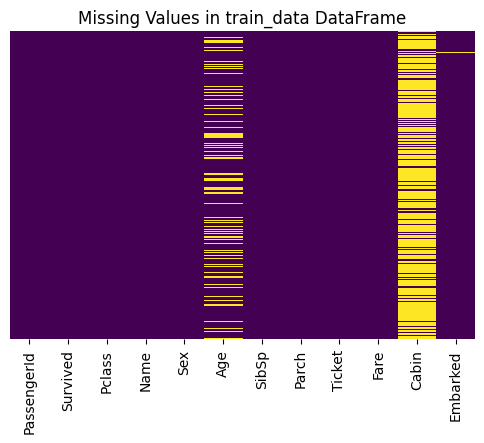

In [7]:
# Check for missing value
missing_values = train_data.isnull()

# Plot missing value heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in train_data DataFrame')
plt.show()

In [8]:
# Number of missing value
missing_count = missing_values.sum()
for feature,value in missing_count.items():
    if value != 0:
        print(feature,':', value)

Age : 177
Cabin : 687
Embarked : 2


In the train dataset, there are 177 missing values in the 'Age' column, 687 missing values in the 'Cabin' column, and 2 missing values in the 'Embarked' column. To address this, we plan to fill the missing 'Age' values with the mean, fill the missing 'Embarked' values with the mode, and drop the 'Cabin' column from the dataset. Before implementing these steps, we will first examine the missing values in the test data to inform our approach for handling missing data in both datasets.

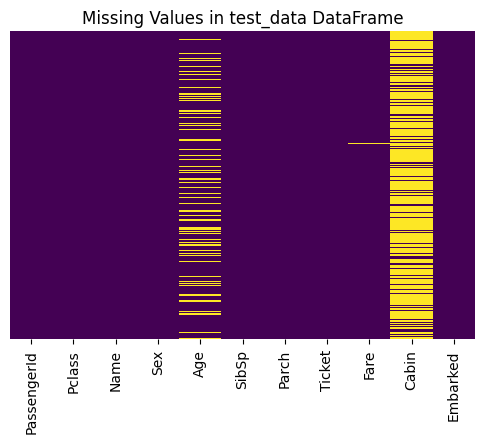

In [9]:
# Check for missing value in test data
missing_values_test = test_data.isnull()

# Plot missing value heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(missing_values_test, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in test_data DataFrame')
plt.show()

In [10]:
# Number of missing value
missing_count_test = missing_values_test.sum()
for feature,value in missing_count_test.items():
    if value != 0:
        print(feature,':', value)

Age : 86
Fare : 1
Cabin : 327


In the test dataset, there is a missing value in the 'Fare' column, which represents the ticket price. Given that ticket prices vary by 'Pclass' (Passenger Class), we intend to fill this missing value with the median fare for the respective passenger class. Additionally, we will apply the previously mentioned methods to handle other missing values in the test data, such as filling 'Age' with the mean, 'Embarked' with the mode, and dropping the 'Cabin' column.

In [11]:
# Mean of Age
mean_age = train_data.Age.mean().round()
print('Mean Age: ',mean_age)

Mean Age:  30.0


In [12]:
# Mode of Embarked
mode_embarked = train_data.Embarked.mode()[0]
print('Mode Embarked: ',mode_embarked)

Mode Embarked:  S


In [13]:
# Median fare for each Pclass
median_fare_by_pclass = train_data.groupby('Pclass')['Fare'].median()
median_fare_by_pclass

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [14]:
# Function for handling missing value
def handleMissingValue(df):
    
    new_df = df.copy()
    
    # Fill null values in 'Age' with mean age and 'Embarked' with mode Emberked
    new_df.Age = new_df.Age.fillna(mean_age)
    new_df.Embarked = new_df.Embarked.fillna(mode_embarked)
    
    # Fill null values in 'Fare' column with corresponding median fare by Pclass
    new_df['Fare'] = new_df.apply(lambda row: median_fare_by_pclass[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)
    
    # Drop 'Cabin' column
    new_df = new_df.drop('Cabin', axis=1)
    
    return new_df

In [15]:
train_data_missing_handled = handleMissingValue(train_data)
if sum(train_data_missing_handled.isnull().sum().tolist()) == 0:
    print("Theres no Missing Value.")

Theres no Missing Value.


## Removing Duplicates

In [16]:
# Check for duplicate
if train_data_missing_handled.duplicated().sum() == 0:
    print("There's no duplicate value")
else:
    print("Total duplicate value: ", train_data.duplicated().sum())

There's no duplicate value


## Dealing with Outliers

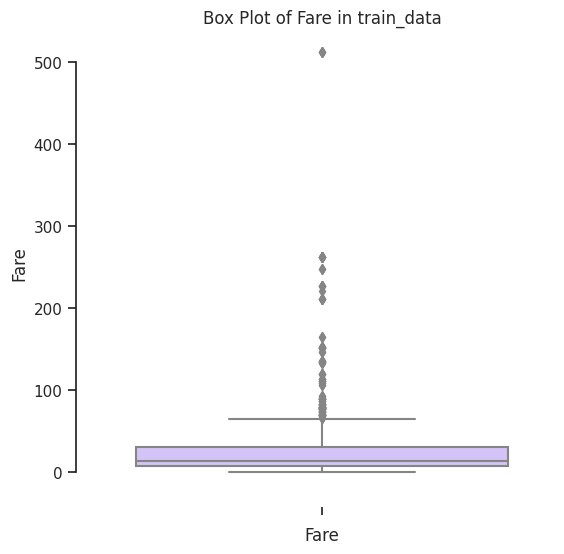

In [17]:
# Create a box plot for the 'Fare' column
plt.figure(figsize=(6, 6))
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(y=train_data_missing_handled['Fare'], palette=["m"])
plt.xlabel('Fare')
plt.title('Box Plot of Fare in train_data')
sns.despine(offset=10, trim=True)

plt.show()

In [18]:
# Calculate the interquartile range (IQR)
Q1 = train_data_missing_handled['Fare'].quantile(0.25)
Q3 = train_data_missing_handled['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print values
print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)
print('Min Value  : ', train_data_missing_handled['Fare'].min())

Lower Bound:  -26.724
Upper Bound:  65.6344
Min Value  :  0.0


Upon detecting outliers in the 'Fare' column through a box plot analysis, it was observed that all outliers exceed the upper bound. Consequently, the decision has been made to address these outliers by replacing them with the 90th percentile value of the 'Fare' column.

In [19]:
# Calculate the 90th percentiles value
percentile_90 = train_data_missing_handled['Fare'].quantile(0.90)
print('90th Percentile Value: ', percentile_90)

90th Percentile Value:  77.9583


In [20]:
# Replace outilers
def removeOutliers(df):
    # Copy of df
    new_df = df.copy()
    # Identify and replace outliers with the 90th percentile value
    new_df['Fare'] = new_df['Fare'].apply(lambda x: percentile_90 if x > percentile_90 else x)
    return new_df

In [21]:
# Replace outilers of train_data
train_data_removed_outliers = removeOutliers(train_data_missing_handled)

Having completed data preprocessing, we will now proceed to exploratory data analysis (EDA) to gain insights and uncover patterns within the dataset.

In [22]:
# Store preprocessed data in train dataset
train_dataset = train_data_removed_outliers.copy()
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Exploratory Data Analysis

## Survival Overview

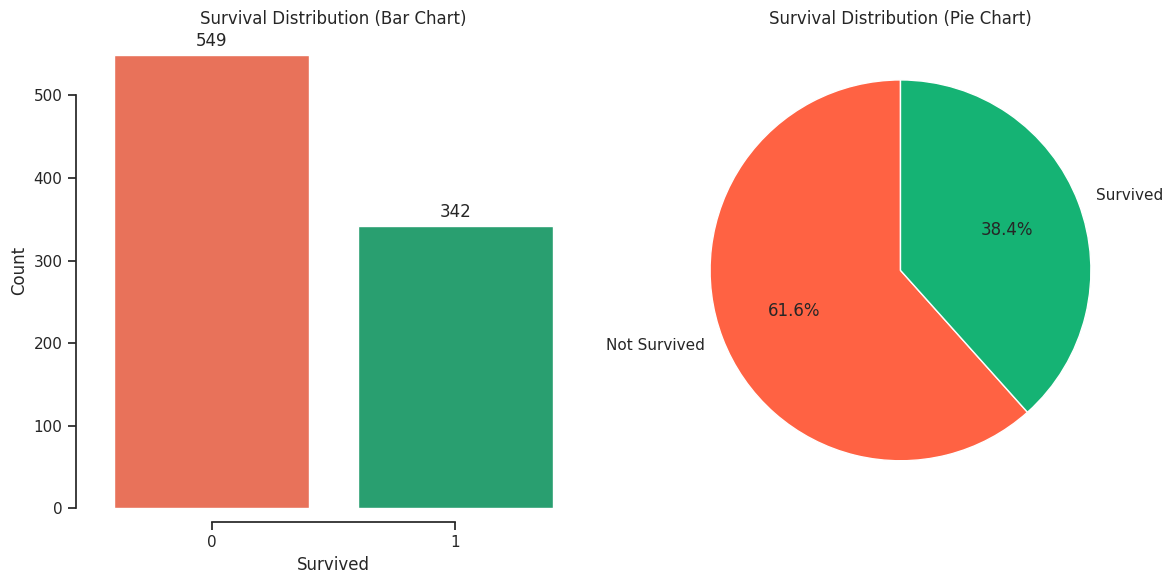

In [23]:
# Count the number of survived and not survived
survived_counts = train_dataset['Survived'].value_counts()

plt.figure(figsize=(12, 6))

# Plot 2: Bar chart
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Survived', data=train_dataset, palette=['#FF6243', '#15B374'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Distribution (Bar Chart)')
# Add count labels above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Plot 1: Pie chart
plt.subplot(1, 2, 2)
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], colors=['#FF6243', '#15B374'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution (Pie Chart)')

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

In the Titanic disaster, a significant majority of passengers, comprising 61.6%, tragically lost their lives, with only 38.4% managing to survive.

## Gender & Survival

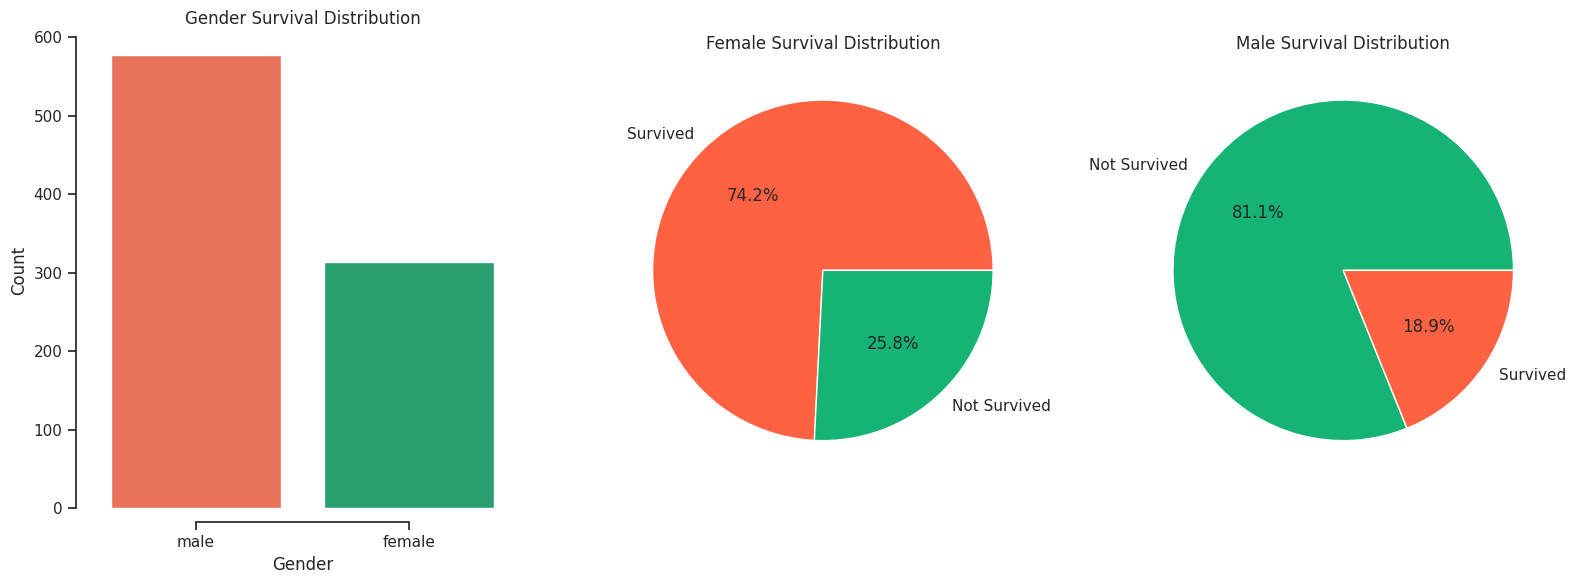

In [24]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Bar chart for the complete dataset
sns.countplot(x='Sex', data=train_dataset, palette=['#FF6243', '#15B374'], ax=axes[0])
axes[0].set_title('Gender Survival Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
sns.despine(offset=10, trim=True)

# Female Pie Chart
female_counts = train_dataset[train_dataset['Sex'] == 'female']['Survived'].value_counts()
axes[1].pie(female_counts, labels=['Survived','Not Survived'], autopct='%1.1f%%', colors=['#FF6243','#15B374'])
axes[1].set_title('Female Survival Distribution')

# Male Pie Chart
male_counts = train_dataset[train_dataset['Sex'] == 'male']['Survived'].value_counts()
axes[2].pie(male_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['#15B374', '#FF6243'])
axes[2].set_title('Male Survival Distribution')

plt.tight_layout()
plt.show()

In the Titanic dataset, the majority of passengers were male; however, during the survival incidents, females exhibited a higher survival rate. This phenomenon suggests a potential prioritization of saving women and children during the disaster, reflecting a common societal norm.

## Survival Relation with Age

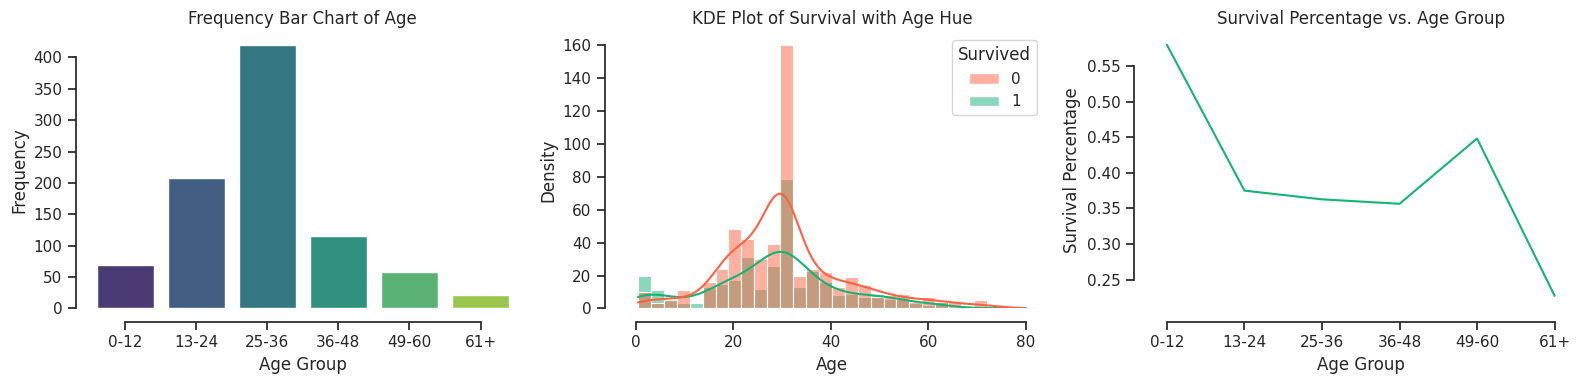

In [25]:
# Define age groups
age_min = train_dataset['Age'].min()
age_max = train_dataset['Age'].max()
age_bins = [age_min,12, 24, 36, 48, 60, age_max]
age_labels = ['0-12','13-24', '25-36', '36-48', '49-60', '61+']

# Copy train dataset
train_data_modified = train_dataset.copy()

# Bin the Age values
train_data_modified['Age_group'] = pd.cut(train_data_modified['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Create a 1-row, 3-column grid
plt.figure(figsize=(16, 4))

# Plot 1: Bar chart of age frequencies
plt.subplot(1, 3, 1)
sns.countplot(x='Age_group', data=train_data_modified, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency Bar Chart of Age')

# Plot 2: KDE plot of survival with age as hue
plt.subplot(1, 3, 2)
sns.histplot(x='Age', hue='Survived', data=train_data_modified, kde=True, palette=['#FF6243', '#15B374'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Survival with Age Hue')

# Plot 3: Line plot representing survival percentage for each age group
plt.subplot(1, 3, 3)
sns.lineplot(x='Age_group', y='Survived', data=train_data_modified, estimator='mean', ci=None, color='#15B374')
plt.xlabel('Age Group')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage vs. Age Group')
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.show()

In the context of the Titanic disaster, the analysis suggests a discernible pattern wherein the rescue efforts appear to prioritize both children and older individuals, indicating a tendency to prioritize the vulnerable age groups.

## Class vs. Survival

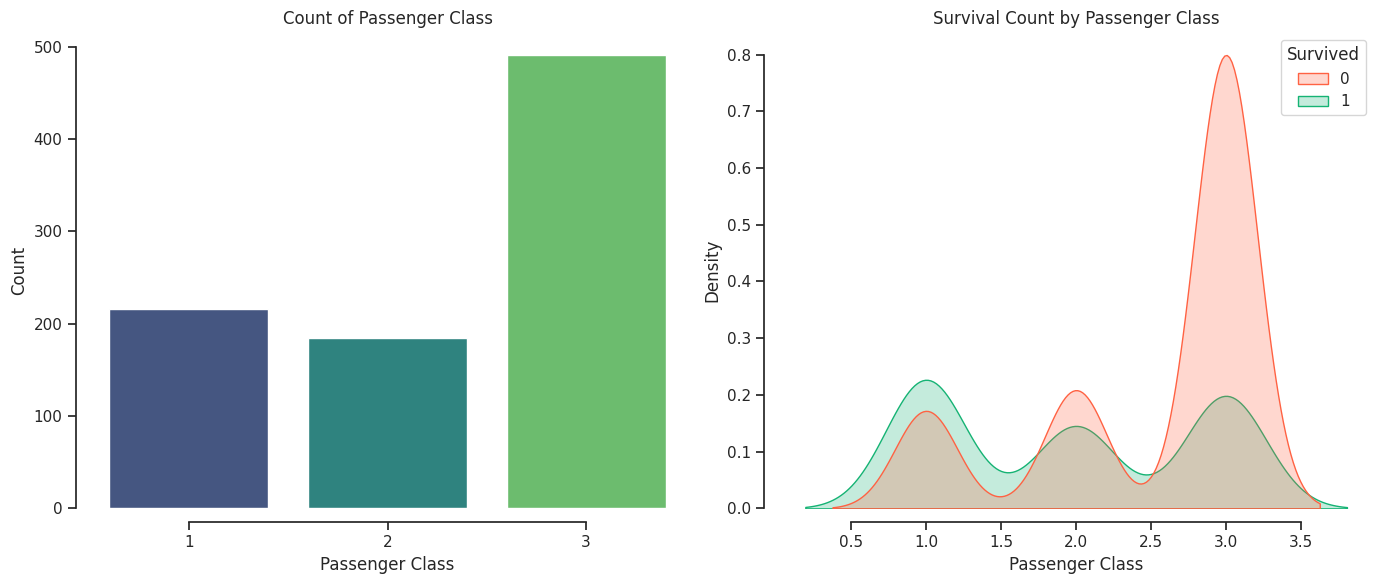

In [26]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# First subplot - Countplot of 'Pclass'
sns.countplot(x='Pclass', data=train_dataset, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Passenger Class')

# Second subplot - KDE plot of 'Pclass' with 'Survived' as hue
sns.kdeplot(x='Pclass', hue='Survived', data=train_dataset, palette=['#FF6243', '#15B374'], ax=axes[1], fill=True)
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Density')
axes[1].set_title('Survival Count by Passenger Class')

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

## Fare Impact on Survival

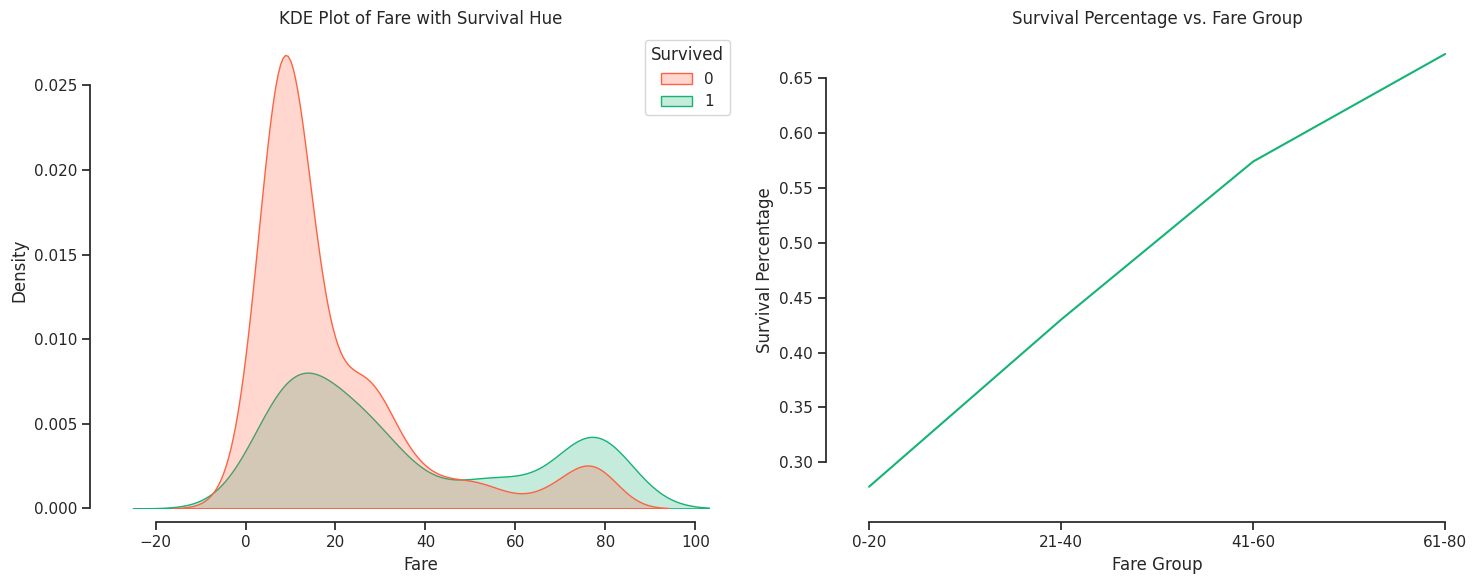

In [27]:
# Create bins for Fare groups
fare_bins = [0, 20, 40, 60, 80, 100]
fare_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Copy train dataset
train_dataset_modified = train_dataset.copy()

# Bin the Fare values
train_dataset_modified['Fare_group'] = pd.cut(train_dataset_modified['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Create a 1-row, 2-column grid
plt.figure(figsize=(15, 6))

# Plot 1: KDE plot with 'Survived' as hue
plt.subplot(1, 2, 1)
sns.kdeplot(x='Fare', hue='Survived', data=train_dataset_modified, palette=['#FF6243', '#15B374'], fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE Plot of Fare with Survival Hue')
sns.despine(offset=10, trim=True)

# Plot 2: Line plot representing survival percentage for each Fare group
plt.subplot(1, 2, 2)
sns.lineplot(x='Fare_group', y='Survived', data=train_dataset_modified, estimator='mean', ci=None, color='#15B374')
plt.xlabel('Fare Group')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage vs. Fare Group')
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.show()

The analysis reveals a correlation between higher fare rates and increased survival percentages also passengers holding 1st class tickets demonstrate a higher likelihood of survival compared to those with 3rd class tickets, highlighting a possible manifestation of socioeconomic disparities in the rescue operations

## Survival Impact of Family Size

In the Titanic dataset, two distinct columns, 'SibSp' representing the number of siblings/spouses aboard, and 'Parch' indicating the number of parents/children aboard, provide information about familial relationships.

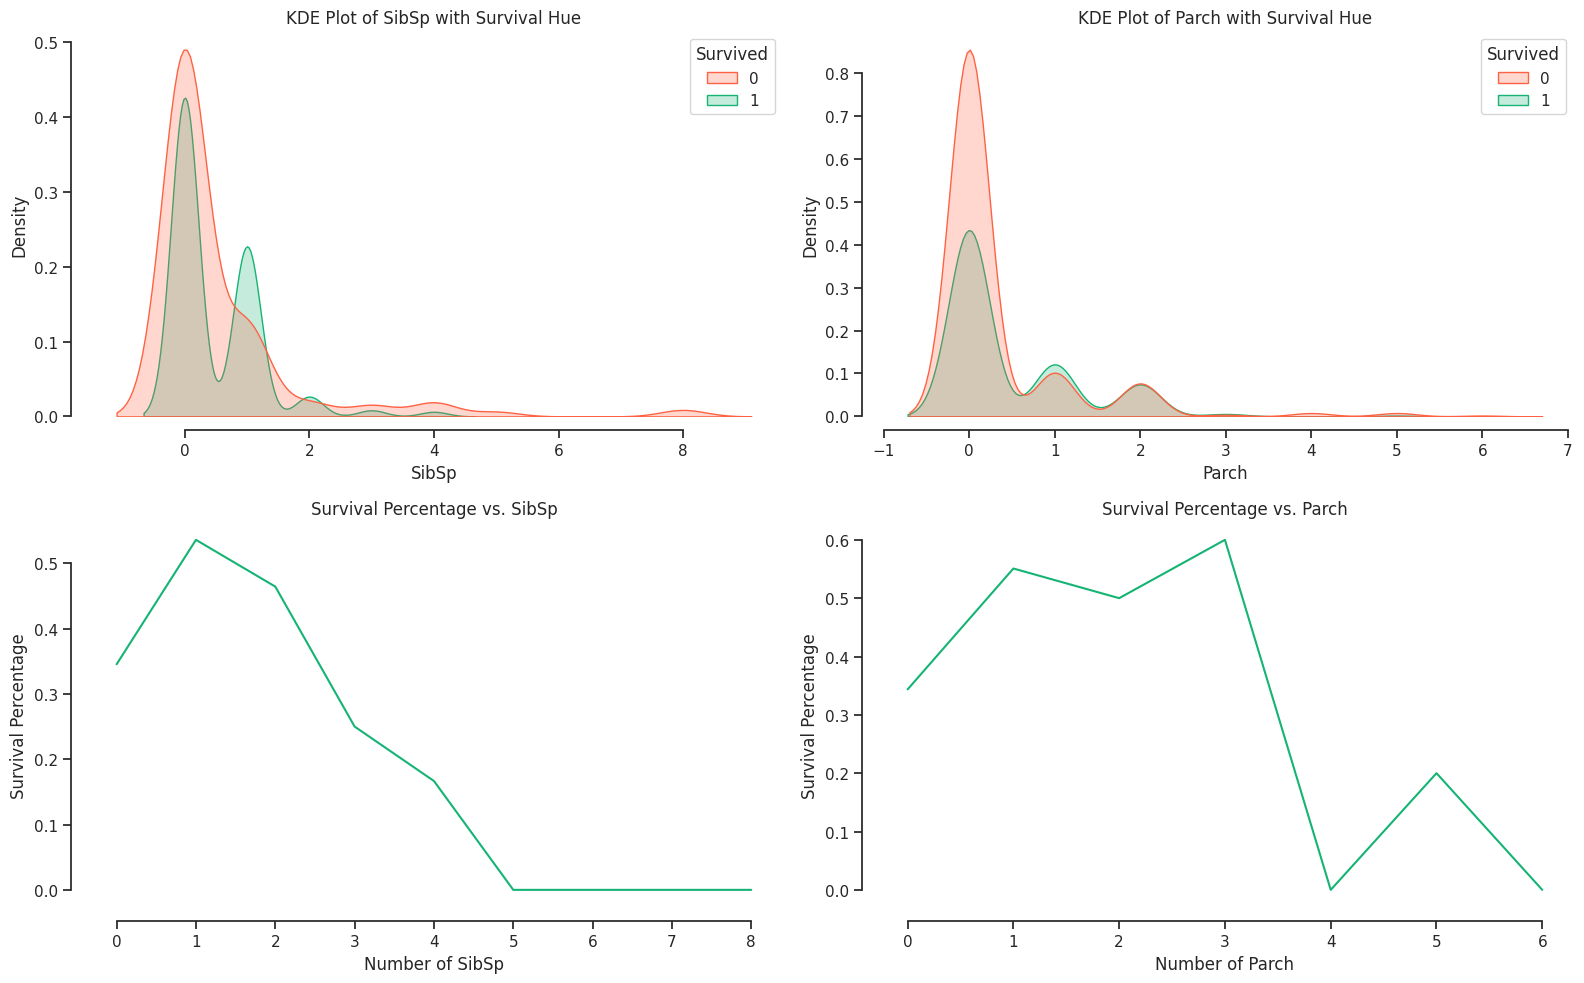

In [28]:
# Create a 2-row, 2-column grid
plt.figure(figsize=(16, 10))

# Plot 1: KDE plot for 'SibSp' with 'Survived' as hue
plt.subplot(2, 2, 1)
sns.kdeplot(x='SibSp', hue='Survived', data=train_dataset, palette=['#FF6243', '#15B374'], fill=True)
plt.xlabel('SibSp')
plt.ylabel('Density')
plt.title('KDE Plot of SibSp with Survival Hue')

# Plot 2: KDE plot for 'Parch' with 'Survived' as hue
plt.subplot(2, 2, 2)
sns.kdeplot(x='Parch', hue='Survived', data=train_dataset, palette=['#FF6243', '#15B374'], fill=True)
plt.xlabel('Parch')
plt.ylabel('Density')
plt.title('KDE Plot of Parch with Survival Hue')

# Plot 3: Line plot representing survival percentage vs Number of SibSp
plt.subplot(2, 2, 3)
sns.lineplot(x='SibSp', y='Survived', data=train_dataset, estimator='mean', ci=None, color='#15B374')
plt.xlabel('Number of SibSp')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage vs. SibSp')

# Plot 4: Line plot representing survival percentage vs Number of Parch
plt.subplot(2, 2, 4)
sns.lineplot(x='Parch', y='Survived', data=train_dataset, estimator='mean', ci=None, color='#15B374')
plt.xlabel('Number of Parch')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage vs. Parch')

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

Let's Analyze on the total number of family member aboard.

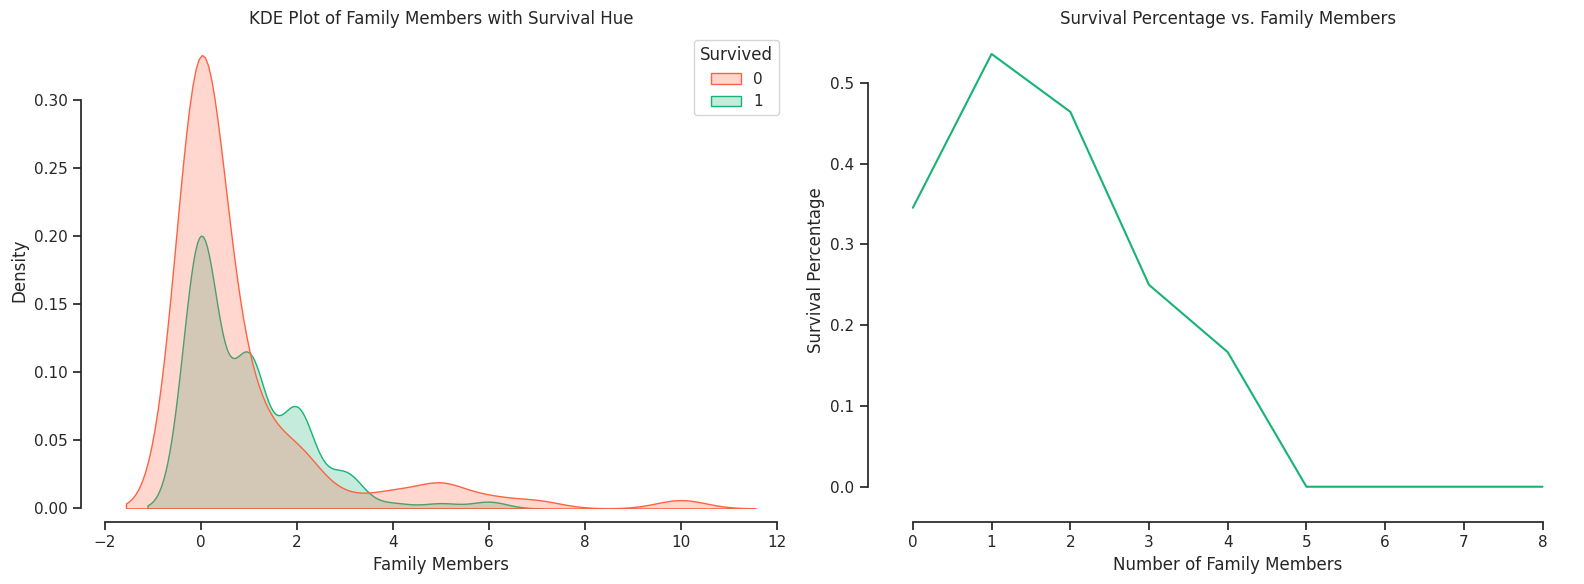

In [29]:
# Create a new column named Family that contains the total family members (SibSp + Parch) abords.
modified_train_dataset = train_dataset.copy()
modified_train_dataset['Family'] = modified_train_dataset['SibSp'] + modified_train_dataset['Parch']

# Create a 1-row, 2-column grid
plt.figure(figsize=(16, 6))

# Plot 2: KDE plot for 'Parch' with 'Survived' as hue
plt.subplot(1, 2, 1)
sns.kdeplot(x='Family', hue='Survived', data=modified_train_dataset, palette=['#FF6243', '#15B374'], fill=True)
plt.xlabel('Family Members')
plt.ylabel('Density')
plt.title('KDE Plot of Family Members with Survival Hue')

# Plot 3: Line plot representing survival percentage vs Number of SibSp
plt.subplot(1, 2, 2)
sns.lineplot(x='SibSp', y='Survived', data=modified_train_dataset, estimator='mean', ci=None, color='#15B374')
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage vs. Family Members')

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

## Embarked vs Survive

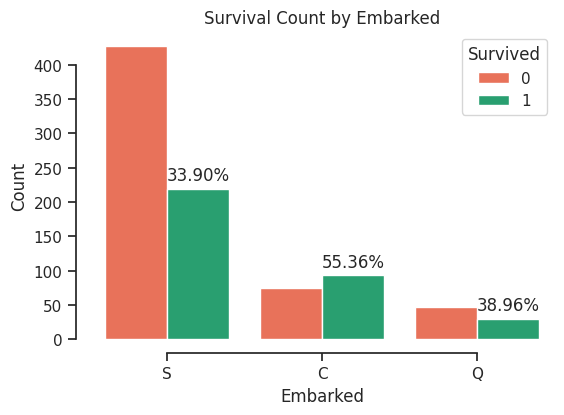

In [30]:
# Plot the count of people who survived from each Embarked category
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Embarked', hue='Survived', data=train_dataset, palette={0: '#FF6243', 1: '#15B374'})

# Set plot labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count by Embarked')
# Add percentage labels on top of Survived == 1 bars
total = len(train_dataset[train_dataset['Survived'] == 1])

# Show the percentage of survived in each Embarked
is_green_bar = False
not_survived = []
survived = []
for p in ax.patches:
    height = p.get_height()
    if is_green_bar == False:
        not_survived.append(height)
        if len(not_survived) == 3:
            is_green_bar = True
    else:
        survived.append(height)
        index = len(survived) -1
        ratio = survived[index] / (not_survived[index] + survived[index]) 
        ax.annotate(f'{ratio:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    

sns.despine(offset=10, trim=True)
plt.show()

# Feature Engineering and Selection

In [31]:
# Lets have a look on train_dataset modified again
train_dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
264,265,0,3,"Henry, Miss. Delia",female,30.0,0,0,382649,7.7500,Q
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,S


## Work with Age

In [32]:
def groupAge(df):
    # Define age groups
    age_min = df['Age'].min()
    age_max = df['Age'].max()
    age_bins = [age_min,12, 24, 36, 48, 60, age_max]
    age_labels = ['0-12','13-24', '25-36', '36-48', '49-60', '61+']
    # Copy train dataset
    new_df = df.copy()
    # Bin the Age values
    new_df['Age'] = pd.cut(new_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
    return new_df

In [33]:
train_data_modified_1 = groupAge(train_dataset)
train_data_modified_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,13-24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36-48,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25-36,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-36,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25-36,0,0,373450,8.0500,S


## Get Family Members from SibSp and Parch

In [34]:
def familyMember(df):
    # Copy of df
    new_df = df.copy()
    # Create a new column named Family that contains the total family members (SibSp + Parch) abords.
    new_df['Family'] = new_df['SibSp'] + new_df['Parch']
    # Make Column Categorical
    new_df['Family'] = new_df['Family'].apply(lambda x: f'{x}' if x < 5 else '4+')
    # Drop SibSp and Parch column
    new_df = new_df.drop(columns = ['SibSp','Parch'], axis = 1)
    return new_df


In [35]:
train_data_modified_2 = familyMember(train_data_modified_1)
train_data_modified_2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,13-24,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36-48,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,25-36,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-36,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,25-36,373450,8.0500,S,0


## Scale Fare Value

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
def scaleFare(df):
    new_df = df.copy()
    # Apply min max scaler
    scaler = MinMaxScaler()
    new_df['Fare'] = scaler.fit_transform(new_df[['Fare']])
    return new_df

In [38]:
train_data_modified_3 = scaleFare(train_data_modified_2)
train_data_modified_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,13-24,A/5 21171,0.092998,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36-48,PC 17599,0.914377,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,25-36,STON/O2. 3101282,0.101657,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,25-36,113803,0.681133,S,1
4,5,0,3,"Allen, Mr. William Henry",male,25-36,373450,0.103260,S,0


## Drop Unnecessary Columns 

To enhance model efficiency, irrelevant features such as 'PassengerId', 'Name', and 'Ticket' are removed from the 'train_dataset' DataFrame.

In [39]:
def dropUnnecessary(df):
    # Copy df 
    new_df = df.copy()
    unnecessary_column = ['PassengerId', 'Name', 'Ticket']
    return new_df.drop(unnecessary_column, axis=1)

In [40]:
train_data_modified_4 = dropUnnecessary(train_data_modified_3)
train_data_modified_4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,13-24,0.092998,S,1
1,1,1,female,36-48,0.914377,C,1
2,1,3,female,25-36,0.101657,S,0
3,1,1,female,25-36,0.681133,S,1
4,0,3,male,25-36,0.103260,S,0


## Feature Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
def encodeFeature(df):
    # Copy df
    new_df = df.copy()
    
    # Specify the columns to be one-hot encoded
    columns_to_encode = ['Pclass', 'Sex', 'Age', 'Embarked', 'Family']
    # One Hot Encoding
    encoder = OneHotEncoder(drop='if_binary', sparse=False)
    df_encoded = pd.DataFrame(encoder.fit_transform(new_df[columns_to_encode]),
                              columns=encoder.get_feature_names_out(columns_to_encode))
    new_df = pd.concat([new_df, df_encoded], axis=1)
    
    # Drop the original categorical columns
    new_df.drop(columns=columns_to_encode, inplace=True)
    
    return new_df

In [43]:
train_data_modified_5 = encodeFeature(train_data_modified_4)
train_data_modified_5.head()

,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Age_0-12,Age_13-24,Age_25-36,Age_36-48,...,Age_61+,Embarked_C,Embarked_Q,Embarked_S,Family_0,Family_1,Family_2,Family_3,Family_4,Family_4+
0,0,0.092998,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.914377,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.101657,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.681133,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.103260,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Copy final datasest for model training
training_dataset = train_data_modified_5.copy()

# Model Training, Evaluation and Selection

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = training_dataset.drop('Survived', axis=1)  # Features
y = training_dataset['Survived']  # Target variable

# Split the dataset into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model Training

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [48]:
# To store accuracy, precision, recall, f1_score
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy['Logistic Regression'] = accuracy_logistic
precision_logistic = precision_score(y_test, y_pred_logistic)
precision['Logistic Regression'] = precision_logistic
recall_logistic = recall_score(y_test, y_pred_logistic)
recall['Logistic Regression'] = recall_logistic
f1_logistic = f1_score(y_test, y_pred_logistic)
f1['Logistic Regression'] = f1_logistic
print("Logistic Regression Accuracy: {:.3f}%".format(accuracy_logistic*100))

Logistic Regression Accuracy: 82.222%


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy['Decision Tree'] = accuracy_tree
precision_tree = precision_score(y_test, y_pred_tree)
precision['Decision Tree'] = precision_tree
recall_tree = recall_score(y_test, y_pred_tree)
recall['Decision Tree'] = recall_tree
f1_tree = f1_score(y_test, y_pred_tree)
f1['Decision Tree'] = f1_tree
print("Decision Tree Accuracy: {:.3f}%".format(accuracy_tree*100))

Decision Tree Accuracy: 82.222%


### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy['Random Forest'] = accuracy_rf
precision_rf = precision_score(y_test, y_pred_rf)
precision['Random Forest'] = precision_rf
recall_rf = recall_score(y_test, y_pred_rf)
recall['Random Forest'] = recall_rf
f1_rf = f1_score(y_test, y_pred_rf)
f1['Random Forest'] = f1_rf
print("Random Forest Accuracy: {:.3f}%".format(accuracy_rf*100))

Random Forest Accuracy: 85.556%


### XGBoost

In [52]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy['XGBoost'] = accuracy_xgb
precision_xgb = precision_score(y_test, y_pred_xgb)
precision['XGBoost'] = precision_xgb
recall_xgb = recall_score(y_test, y_pred_xgb)
recall['XGBoost'] = recall_xgb
f1_xgb = f1_score(y_test, y_pred_xgb)
f1['XGBoost'] = f1_xgb

print("XGBoost Classifier Accuracy: {:.3f}%".format(accuracy_xgb*100))

XGBoost Classifier Accuracy: 83.333%


## Model Selection

In [53]:
# Model Accuracy, Precision, Recall and F1 Score
metrics_dict = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.822222,0.763158,0.805556,0.783784
Decision Tree,0.822222,0.750000,0.833333,0.789474
Random Forest,0.855556,0.780488,0.888889,0.831169
XGBoost,0.833333,0.756098,0.861111,0.805195


After evaluating various machine learning models, the Random Forest classifier emerged as the most effective, demonstrating superior accuracy compared to other models.

## Pipeline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target variable

# Create a pipeline
pipeline = Pipeline([
    ('missing_handling', FunctionTransformer(handleMissingValue)),
    ('remove_outliers', FunctionTransformer(removeOutliers)),
    ('group_age', FunctionTransformer(groupAge)),
    ('family_member', FunctionTransformer(familyMember)),
    ('scale_fare', FunctionTransformer(scaleFare)),
    ('drop_unnecessary', FunctionTransformer(dropUnnecessary)),
    ('encode_feature', FunctionTransformer(encodeFeature)),
    ('random_forest', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X, y)

Pipeline(steps=[('missing_handling',
                 FunctionTransformer(func=<function handleMissingValue at 0x785ca1115360>)),
                ('remove_outliers',
                 FunctionTransformer(func=<function removeOutliers at 0x785ca1114ca0>)),
                ('group_age',
                 FunctionTransformer(func=<function groupAge at 0x785c9e6c16c0>)),
                ('family_member',
                 FunctionTransformer(func=<function familyMember at 0x785c9e6da320>)),
                ('scale_fare',
                 FunctionTransformer(func=<function scaleFare at 0x785c9c8004c0>)),
                ('drop_unnecessary',
                 FunctionTransformer(func=<function dropUnnecessary at 0x785c9e6d8310>)),
                ('encode_feature',
                 FunctionTransformer(func=<function encodeFeature at 0x785c9c800550>)),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [55]:
# Accuracy for Train Data
y_train_pred = pipeline.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_train_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y, y_train_pred)

# Classification Report
class_report = classification_report(y, y_train_pred)
print("Classification Report:\n", class_report)

Accuracy: 93.490%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       549
           1       0.93      0.90      0.91       342

    accuracy                           0.93       891
   macro avg       0.93      0.93      0.93       891
weighted avg       0.93      0.93      0.93       891



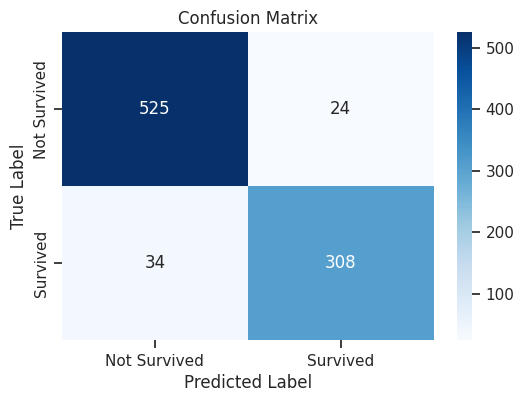

In [56]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Test and Submit

In [57]:
# Predict Result for Test Dataset
y_pred = pipeline.predict(test_data)

In [58]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Lets Submit!")

Lets Submit!


## Thank you 😊